# Exact Inference with Probabilistic Graphical Models

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install libpgm

In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/

/content/gdrive/My Drive/Colab Notebooks


In [4]:
import bif_parser
import prettytable
import pydot
from IPython.core.display import Image
from bayesian.bbn import *

name = 'asia'
module_name = bif_parser.parse(name)
module = __import__(module_name)
bg = module.create_bbn()

# Q.1.

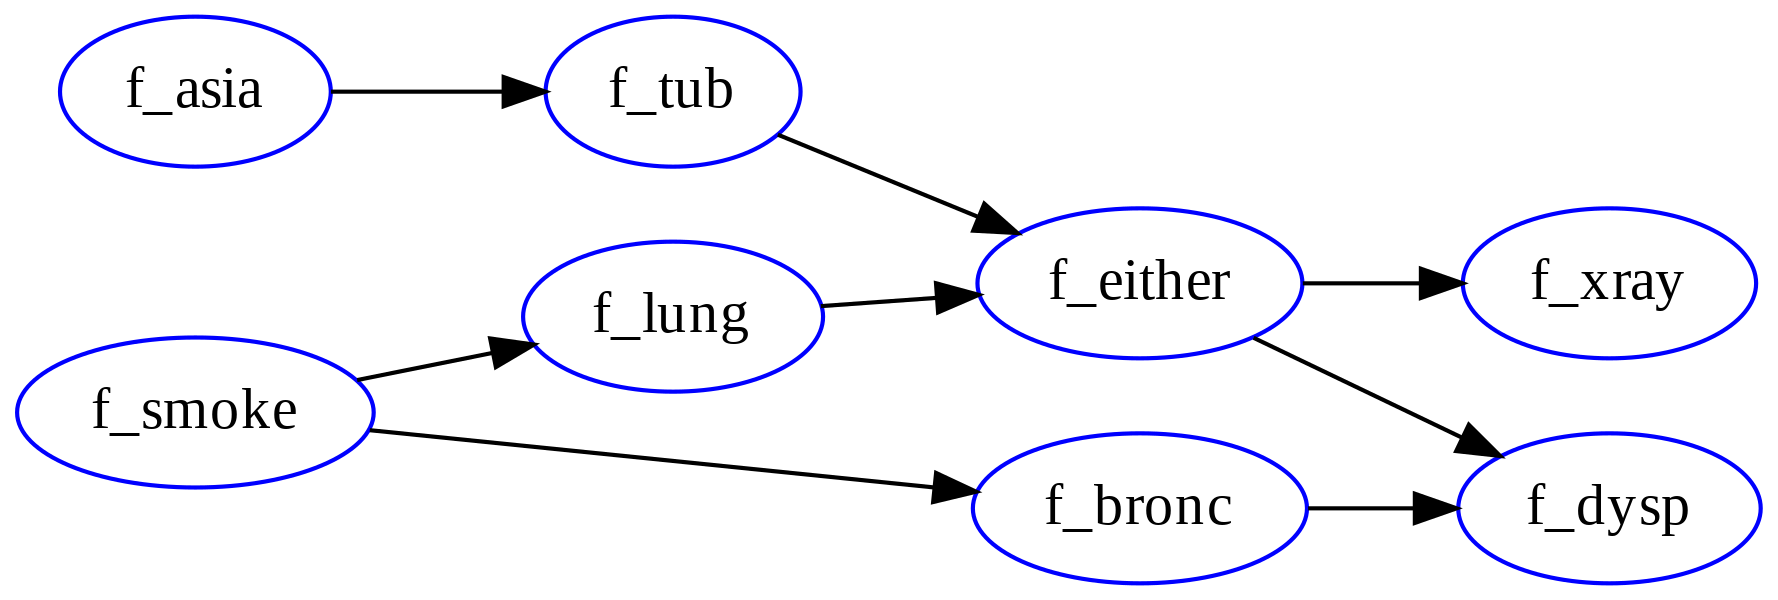

In [5]:
def show_graphgiz_image(graphviz_data):
  graph, = pydot.graph_from_dot_data(graphviz_data)
  graph.write_png('temp.png')
  return 'temp.png'

sf=bg.get_graphviz_source()
Image(filename=show_graphgiz_image(sf))

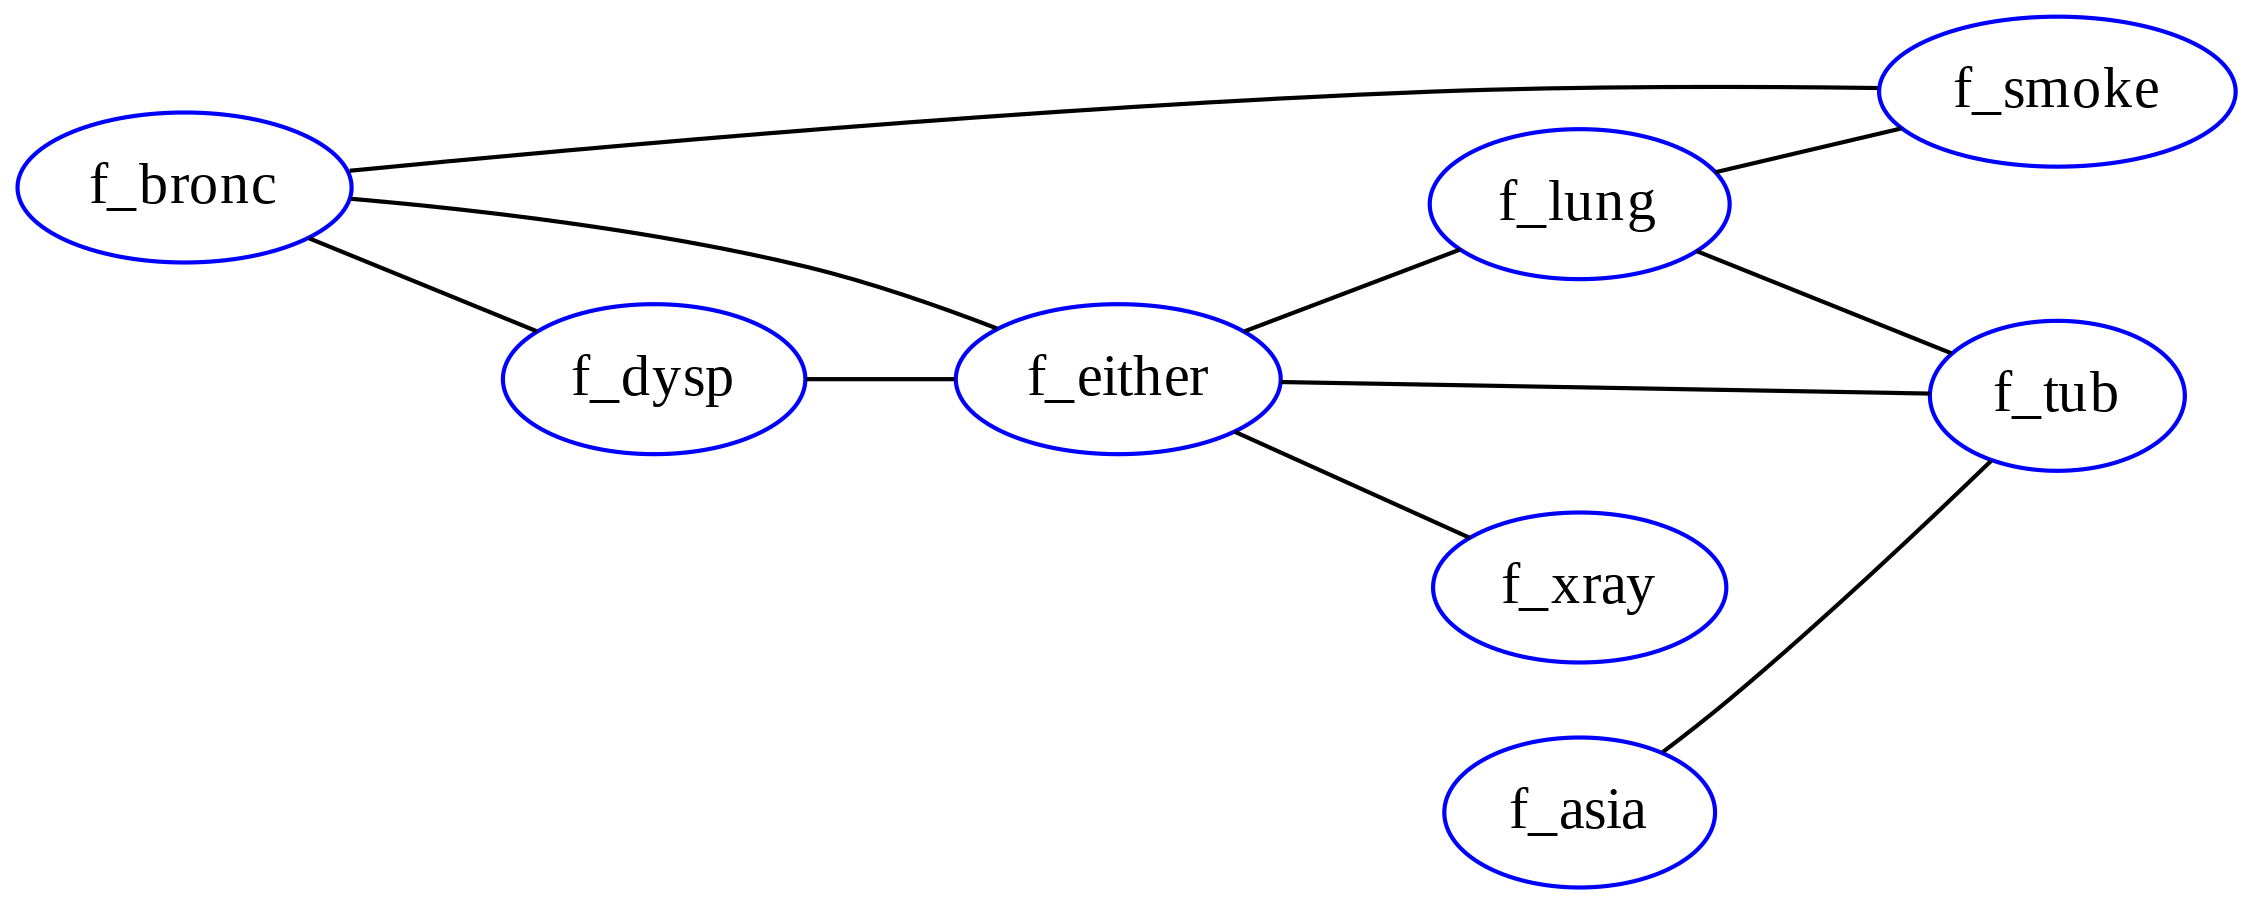

In [6]:
gu=make_undirected_copy(bg)
m1=make_moralized_copy(gu,bg)
s2=m1.get_graphviz_source()
Image(filename=show_graphgiz_image(s2))

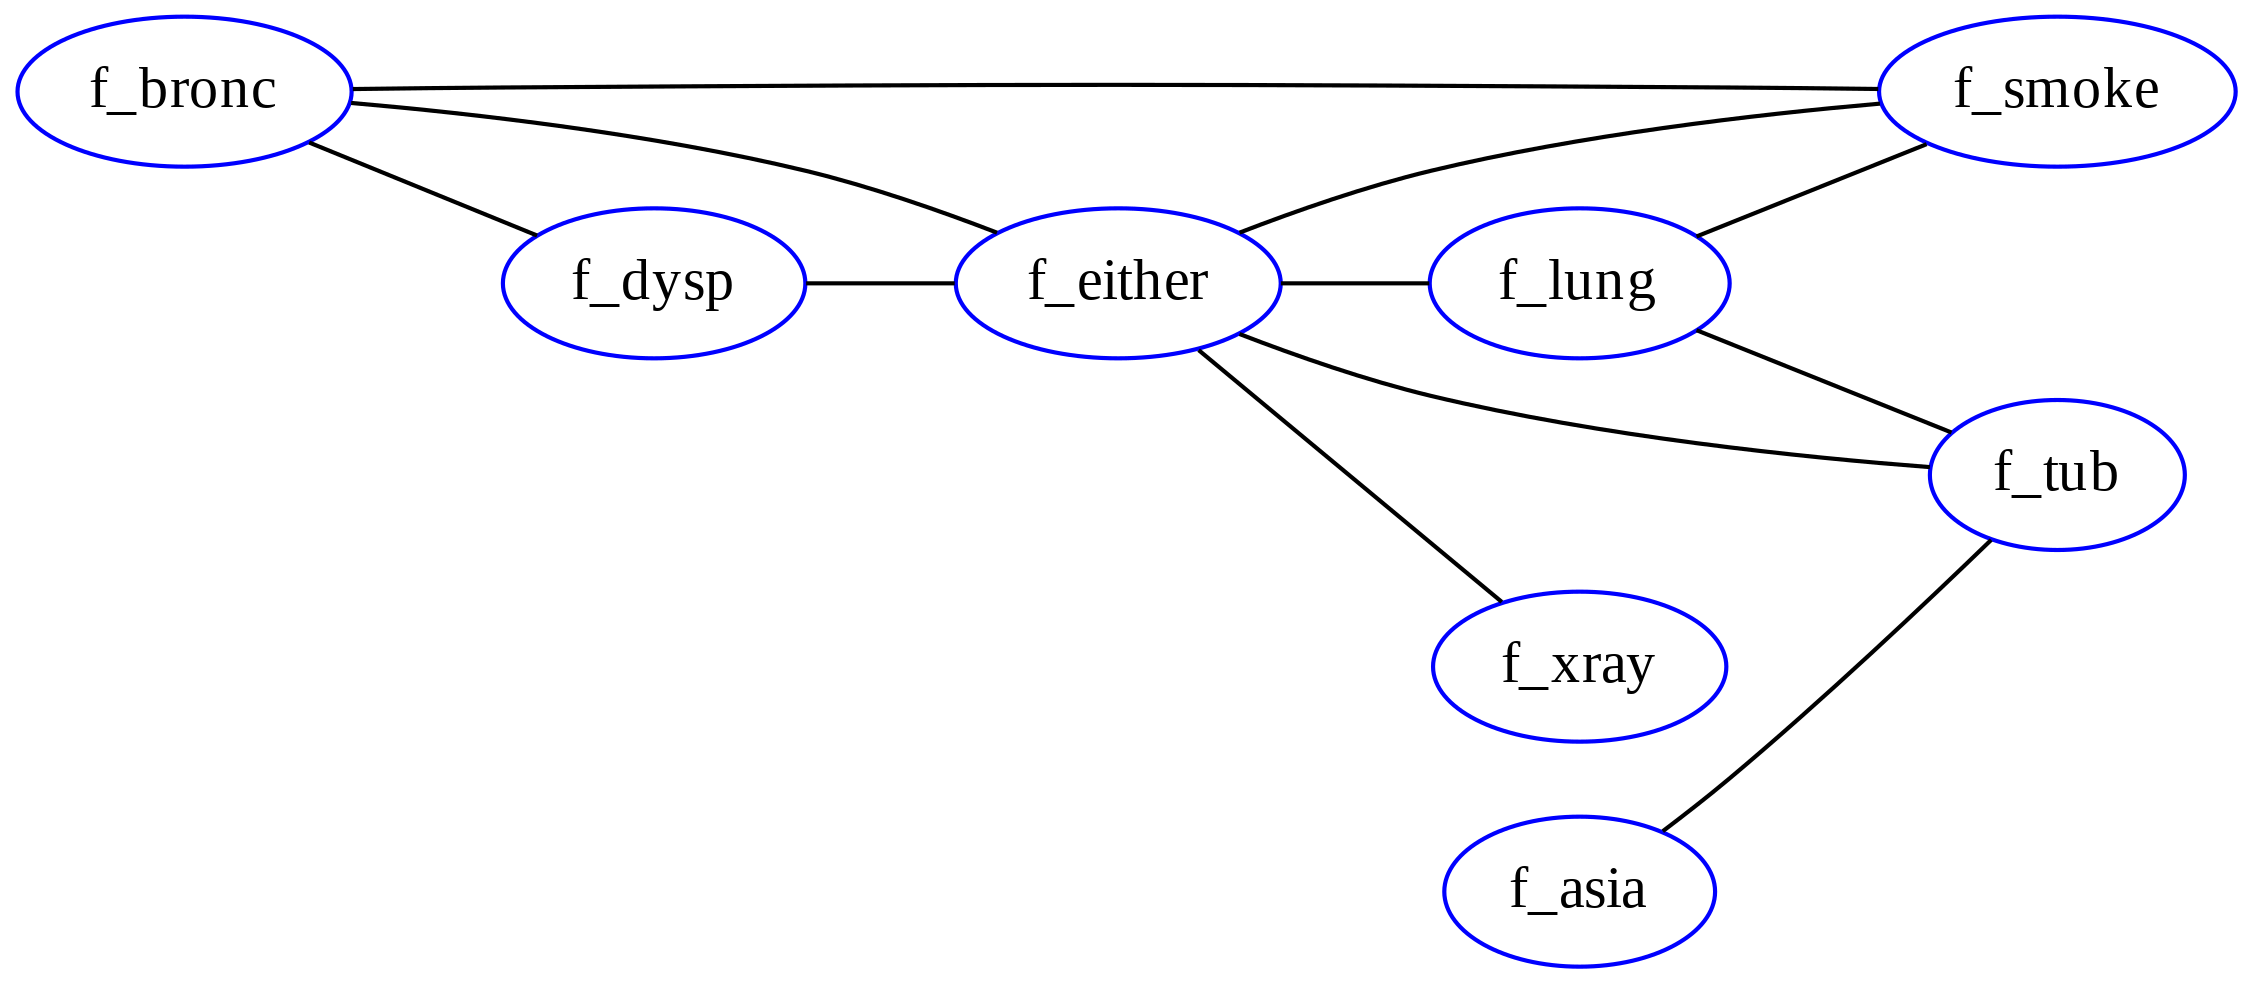

In [7]:
cliques, elimination_ordering = triangulate(m1, priority_func)
s2=m1.get_graphviz_source()
Image(filename=show_graphgiz_image(s2))

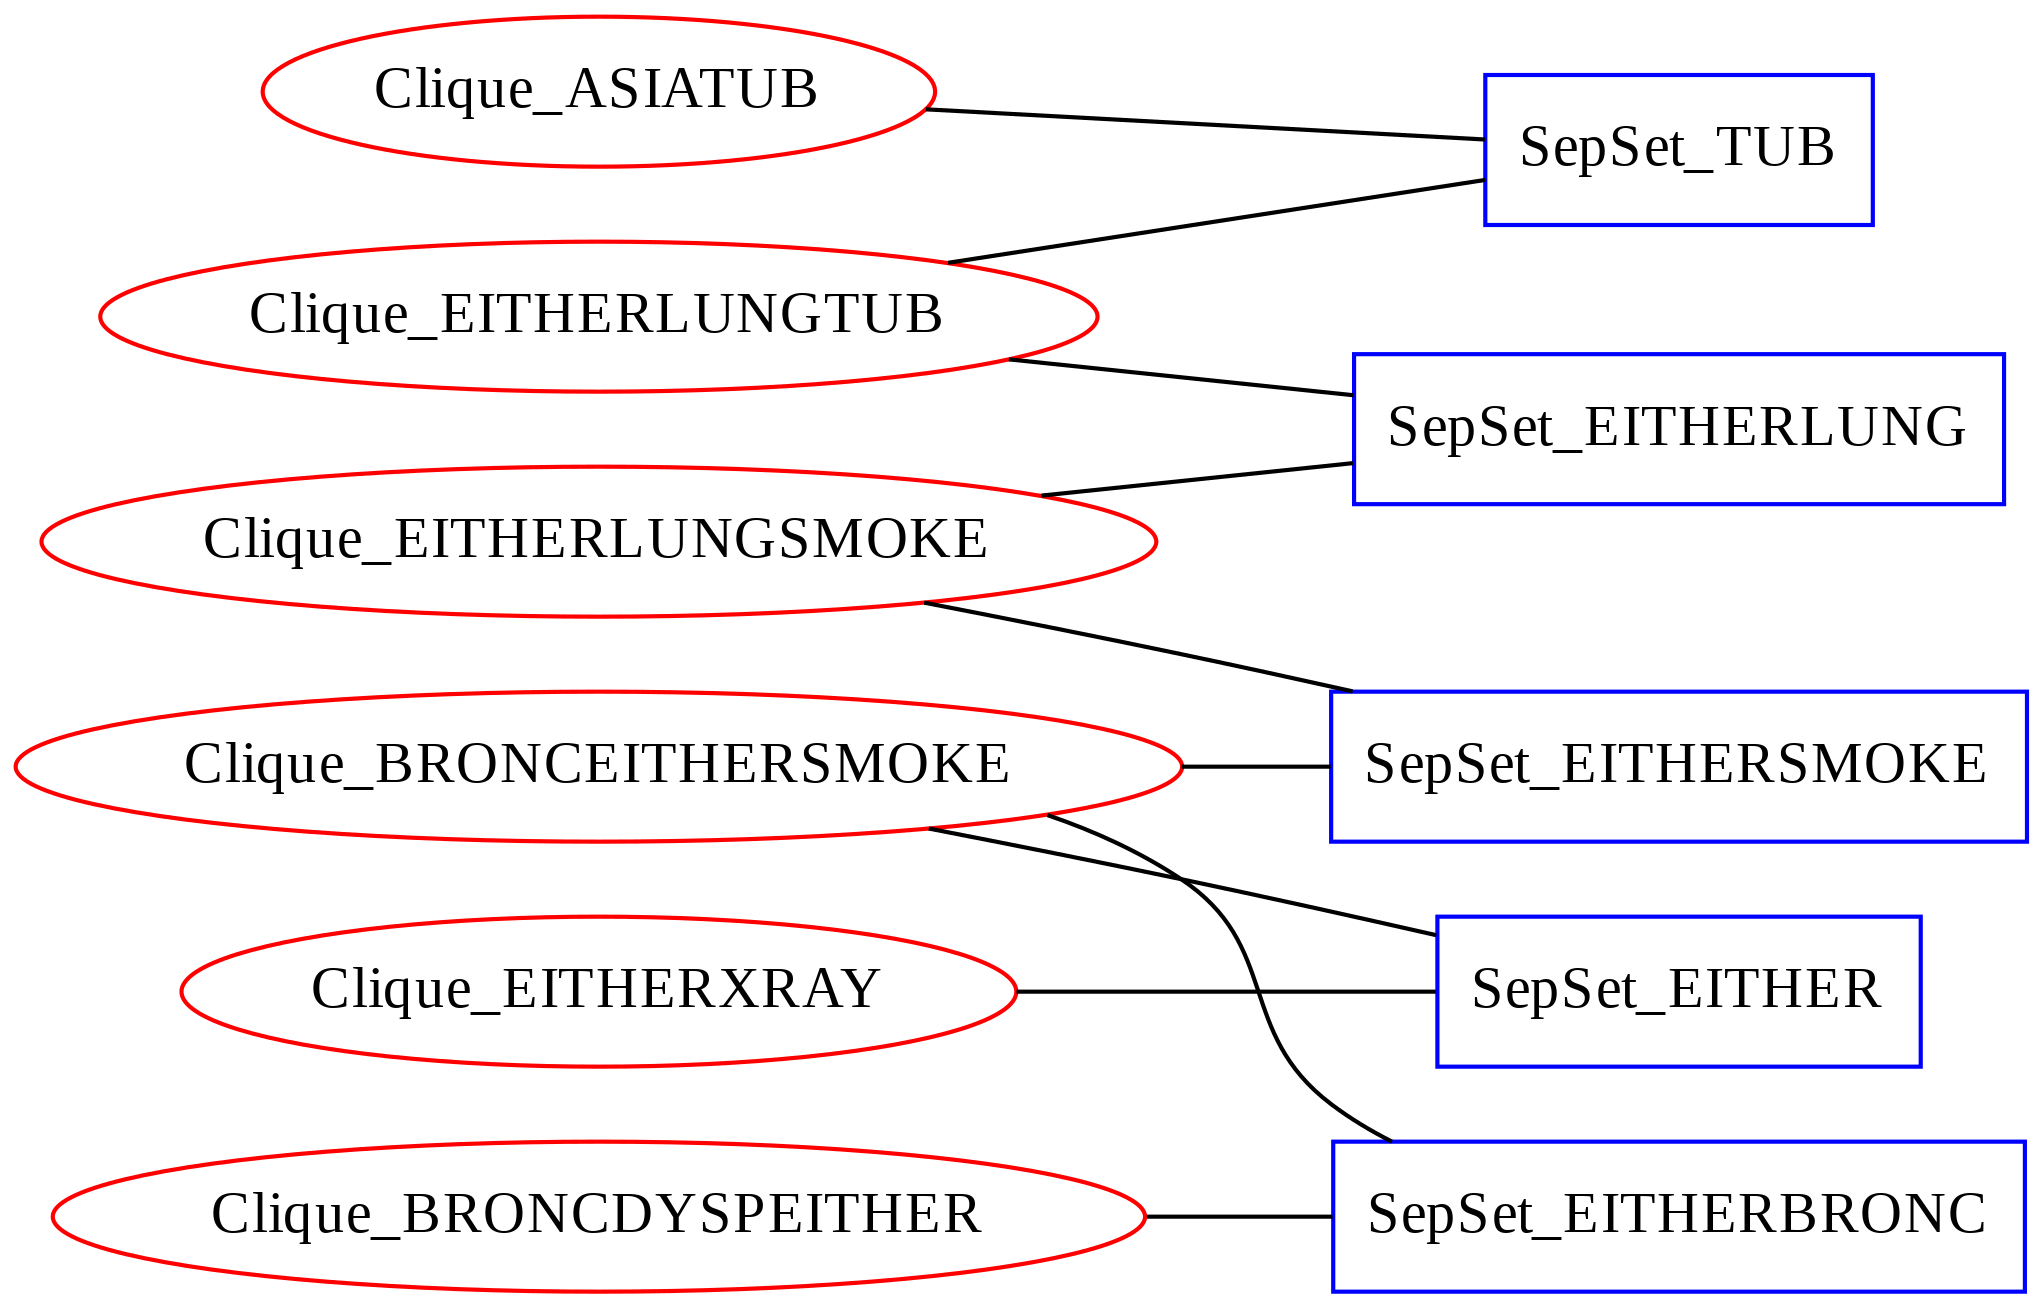

In [8]:
jt=bg.build_join_tree()
sf=jt.get_graphviz_source()
Image(filename=show_graphgiz_image(sf))

## Running Intersection Property:
1) for given two clusters (A & B), If these two clusters have a common node(i), the Running Intersection Property is said to be satisfied if the common node is included in all clusters between the two clusters.

For example: In our case we can see that node A=  {'either', 'lung' ,'tub'} & Node B=  {'bronc', 'dysp' ,'either'} have a common node 'either'. This node either is present in each cluster joining a unique path between Node A & B.

This trend is possible with all other nodes in our graph.

Thus, "running intersection property" is satisfied in our junction tree.



In [9]:
assignments = jt.assign_clusters(bg)
jt.initialize_potentials(assignments,bg)

In [10]:
jt.propagate()

# Q.2

In [19]:
# Q.2(b) Printing Messages:
for i in jt.clique_nodes:
  print(i.potential_tt)

{(('asia', 'yes'), ('tub', 'no')): 0.0095, (('asia', 'yes'), ('tub', 'yes')): 0.0005, (('asia', 'no'), ('tub', 'yes')): 0.0099, (('asia', 'no'), ('tub', 'no')): 0.9801}
{(('either', 'yes'), ('xray', 'yes')): 0.06353144000000001, (('either', 'yes'), ('xray', 'no')): 0.0012965600000000002, (('either', 'no'), ('xray', 'no')): 0.8884133999999999, (('either', 'no'), ('xray', 'yes')): 0.0467586}
{(('bronc', 'yes'), ('dysp', 'yes'), ('either', 'no')): 0.33131807999999996, (('bronc', 'no'), ('dysp', 'yes'), ('either', 'no')): 0.05210244, (('bronc', 'yes'), ('dysp', 'no'), ('either', 'yes')): 0.003585240000000001, (('bronc', 'no'), ('dysp', 'no'), ('either', 'yes')): 0.008692680000000001, (('bronc', 'no'), ('dysp', 'no'), ('either', 'no')): 0.46892195999999997, (('bronc', 'yes'), ('dysp', 'no'), ('either', 'no')): 0.08282951999999999, (('bronc', 'no'), ('dysp', 'yes'), ('either', 'yes')): 0.020282920000000003, (('bronc', 'yes'), ('dysp', 'yes'), ('either', 'yes')): 0.03226716000000001}
{(('bron

In [11]:
bronc_clust=[i for i in jt.clique_nodes for v in i.variable_names if v =='bronc']
bronc_clust[0].potential_tt

{(('bronc', 'no'), ('dysp', 'no'), ('either', 'no')): 0.46892195999999997,
 (('bronc', 'no'), ('dysp', 'no'), ('either', 'yes')): 0.008692680000000001,
 (('bronc', 'no'), ('dysp', 'yes'), ('either', 'no')): 0.05210244,
 (('bronc', 'no'), ('dysp', 'yes'), ('either', 'yes')): 0.020282920000000003,
 (('bronc', 'yes'), ('dysp', 'no'), ('either', 'no')): 0.08282951999999999,
 (('bronc', 'yes'), ('dysp', 'no'), ('either', 'yes')): 0.003585240000000001,
 (('bronc', 'yes'), ('dysp', 'yes'), ('either', 'no')): 0.33131807999999996,
 (('bronc', 'yes'), ('dysp', 'yes'), ('either', 'yes')): 0.03226716000000001}

In [12]:
pot=bronc_clust[0].potential_tt

sum_assignments=lambda imap,tup:sum([v for k,v in imap.iteritems() for
i in k if i == tup])

yes=[sum_assignments(pot,('bronc',i)) for i in ['yes']]

print(yes)
#print 'bronc: yes ', yes/float(yes+no),")

[0.44999999999999996]


In [31]:
actual_bronc_yes_probability = bg.query()[('bronc', 'yes')]
print(actual_bronc_yes_probability)

0.45


# Hence as you can see that **actual probability** for {'bronc':yes} from the original data table is equal to **marginalized probality** of {'bronc':yes} using **Joint Tree Algorithm**. i.e. both are equal to **0.45**.

# Also other clusters that contain 'bronc' return the same marginal values.

In [33]:
pot=bronc_clust[0].potential_tt

#a function to return the sum for a specific assignment, such as 'bronc,yes'
sum_assignments=lambda imap,tup:sum([v for k,v in imap.iteritems() for i in k if i == tup])

#get the sum for bronc=yes and bronc=no
yes,no=[sum_assignments(pot,('bronc',i)) for i in ['yes','no']]

print 'bronc first cluster: yes ', yes/float(yes+no)," no ", no/float(yes+no)

pot2=bronc_clust[1].potential_tt

#get the sum for bronc=yes and bronc=no
yes,no=[sum_assignments(pot2,('bronc',i)) for i in ['yes','no']]

print 'bronc second cluster: yes ', yes/float(yes+no)," no ", no/float(yes+no)

bronc first cluster: yes  0.45  no  0.55
bronc second cluster: yes  0.45  no  0.55


# Similarly we can get marginalized probabilities for all other variables.

In [41]:
asia_clust=[i for i in jt.clique_nodes for v in i.variable_names if v =='asia']
asia_clust[0].potential_tt

pot=asia_clust[0].potential_tt


yes,no=[sum_assignments(pot,('asia',i)) for i in ['yes','no']]


print 'asia: yes ', yes/float(yes+no)," no ", no/float(yes+no)

asia: yes  0.01  no  0.99


In [37]:
dysp_clust=[i for i in jt.clique_nodes for v in i.variable_names if v =='dysp']
dysp_clust[0].potential_tt

pot=dysp_clust[0].potential_tt


yes,no=[sum_assignments(pot,('dysp',i)) for i in ['yes','no']]


print 'dysp: yes ', yes/float(yes+no)," no ", no/float(yes+no)

dysp: yes  0.4359706  no  0.5640294


In [36]:
xray_clust=[i for i in jt.clique_nodes for v in i.variable_names if v =='xray']
xray_clust[0].potential_tt

pot=xray_clust[0].potential_tt


yes,no=[sum_assignments(pot,('xray',i)) for i in ['yes','no']]


print 'xray: yes ', yes/float(yes+no)," no ", no/float(yes+no)

xray: yes  0.11029004  no  0.88970996


In [42]:
smoke_clust=[i for i in jt.clique_nodes for v in i.variable_names if v =='smoke']
smoke_clust[0].potential_tt

pot=smoke_clust[0].potential_tt


yes,no=[sum_assignments(pot,('smoke',i)) for i in ['yes','no']]


print 'smoke: yes ', yes/float(yes+no)," no ", no/float(yes+no)

smoke: yes  0.5  no  0.5


In [39]:
tub_clust=[i for i in jt.clique_nodes for v in i.variable_names if v =='tub']
tub_clust[0].potential_tt

pot=tub_clust[0].potential_tt


yes,no=[sum_assignments(pot,('tub',i)) for i in ['yes','no']]


print 'tub: yes ', yes/float(yes+no)," no ", no/float(yes+no)

tub: yes  0.0104  no  0.9896


In [40]:
either_clust=[i for i in jt.clique_nodes for v in i.variable_names if v =='either']
either_clust[0].potential_tt

pot=either_clust[0].potential_tt


yes,no=[sum_assignments(pot,('either',i)) for i in ['yes','no']]


print 'either: yes ', yes/float(yes+no)," no ", no/float(yes+no)

either: yes  0.064828  no  0.935172


In [38]:
lung_clust=[i for i in jt.clique_nodes for v in i.variable_names if v =='lung']
lung_clust[0].potential_tt

pot=lung_clust[0].potential_tt


yes,no=[sum_assignments(pot,('lung',i)) for i in ['yes','no']]


print 'lung: yes ', yes/float(yes+no)," no ", no/float(yes+no)

lung: yes  0.055  no  0.945


___

# Q.2.c

In [43]:
from libpgm.graphskeleton import GraphSkeleton
from libpgm.nodedata import NodeData
from libpgm.discretebayesiannetwork import DiscreteBayesianNetwork
from libpgm.tablecpdfactor import TableCPDFactor
import itertools
import pandas as pd
from libpgm.tablecpdfactorization import TableCPDFactorization
def loadbn(jsonpath):
  nd = NodeData()
  skel = GraphSkeleton()
  nd.load(jsonpath)
  skel.load(jsonpath)
  skel.toporder()
  bn = DiscreteBayesianNetwork(skel, nd)
  return bn
bn=loadbn("asia1.txt")

In [48]:
def printdist(jd,bn,normalize=False):
  x=[bn.Vdata[i]["vals"] for i in jd.scope]
  zipover=[i/sum(jd.vals) for i in jd.vals] if normalize else jd.vals
 
  k=[a + [b] for a,b in zip([list(i) for i in itertools.
  product(*x[::-1])],zipover)]
  df=pd.DataFrame.from_records(k,columns=[i for i in reversed(jd.
  scope)]+['probability'])
  return df

In [50]:
bn = loadbn("asia1.txt")
evidence = {"asia":'yes' ,"xray":'yes'}
query = {"tub":'yes', "lung":'yes', "bronc":'yes'}

fn = TableCPDFactorization(bn)
result = fn.condprobve(query, evidence)
printdist(result,bn)

,lung,bronc,tub,probability
0,yes,yes,yes,0.010638
1,yes,yes,no,0.202123
2,yes,no,yes,0.007936
3,yes,no,no,0.150790
4,no,yes,yes,0.141334
5,no,yes,no,0.137007
6,no,no,yes,0.177807
7,no,no,no,0.172364


## The joint probability of {tub=yes, lung=yes, bronc=yes}, given evidence that {asia=yes, xray=yes} = **0.010638**